In [61]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Importing csit_stats
import csit_stats

In [62]:
# Loading shapefile and creating a Geo-Dataframe (gdf)
shapefile_path = './gis-map/districts.shp'
csv_path = './data/college_csit.csv'
gdf = gpd.read_file(shapefile_path)
df = pd.read_csv(csv_path)

In [63]:
# Visualize the data of the map without the geometry data (takes a lot of space)
gdf_without_geometry = gdf.drop("geometry", axis=1).copy()
gdf_without_geometry.style.set_table_styles([{'selector': 'caption', 'props': [('text-align', 'left')]}])

,fid,DISTRICT,FIRST_STAT,FIRST_DIST
0,1,ACHHAM,7.000000,ACHHAM
1,2,ARGHAKHANCHI,5.000000,ARGHAKHANCHI
2,3,BAGLUNG,4.000000,BAGLUNG
3,4,BAITADI,7.000000,BAITADI
4,5,BAJHANG,7.000000,BAJHANG
5,6,BAJURA,7.000000,BAJURA
6,7,BANKE,5.000000,BANKE
7,8,BARA,2.000000,BARA
8,9,BARDIYA,5.000000,BARDIYA
9,10,BHAKTAPUR,3.000000,BHAKTAPUR


In [64]:
# Defining function for data visualization
def color_district(geodataframe, 
                   districts_arr,
                   color:str = "royalblue", 
                   title:str = "Districts of Nepal",
                   axis:bool = True):
    districts_arr = [district.upper() for district in districts_arr]
    geodataframe["color"] = geodataframe["DISTRICT"].apply(
        lambda x: color if x in districts_arr else "lightgray" 
    )
    fig, ax = plt.subplots(figsize=(10, 10))
    geodataframe.plot(ax=ax, color=gdf["color"], edgecolor="whitesmoke")
    ax.set_title(title)
    if axis != True:
        ax.set_axis_off()
    plt.show()

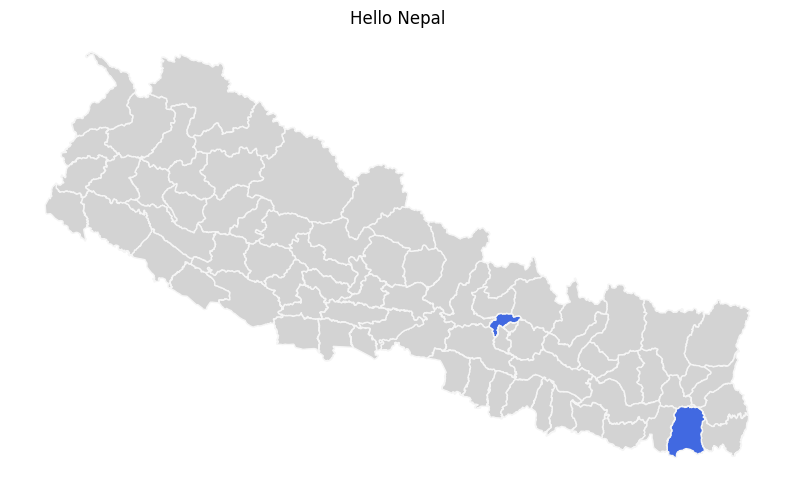

In [65]:
# Example I: Coloring Districts
districts = ["Kathmandu", "Morang"]
color_district(gdf, districts, title="Hello Nepal", axis=False)


['Lalitpur' 'Kathmandu' 'Bhaktapur' 'Kavrepalanchok' 'Kanchanpur'
 'Dhanusha' 'Jhapa' 'Sunsari' 'Morang' 'Parsa' 'Makwanpur' 'Chitwan'
 'Nawalparasi' 'Kaski' 'Rupandehi' 'Banke' 'Dang']


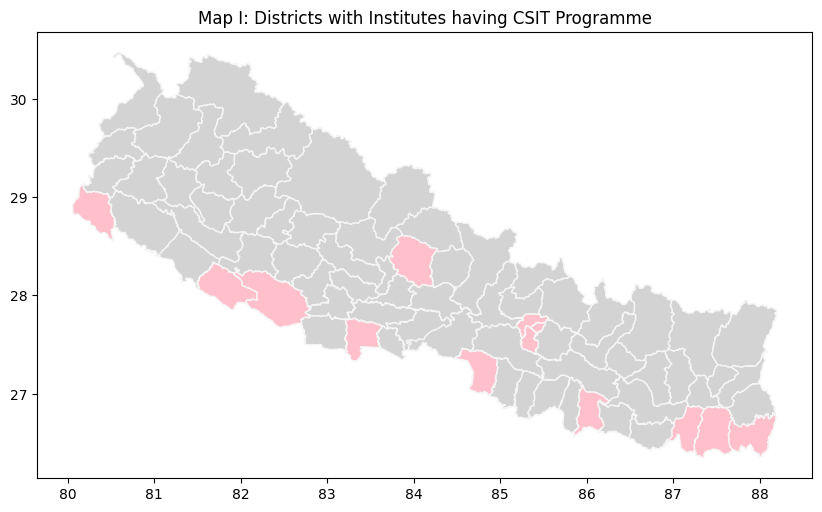

In [66]:
# Coloring I: Display Districts with CSIT Programme
districts_with_csit = csit_stats.districts_csit
print(districts_with_csit)
color_district(gdf,
               districts_arr=districts_with_csit,
               color="pink",
               title="Map I: Districts with Institutes having CSIT Programme",
               axis=True)

